In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random #This is to use the random() function

LOADING THE DATASETS AND RESHAPING THEM

In [31]:
X_train = np.loadtxt('train_X.csv', delimiter = ',').T #The .T is to transpose the data to suit the shape used in the calculations
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T

X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T

In [32]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test  :", X_test.shape)
print("shape of Y_test  :", Y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test  : (784, 350)
shape of Y_test  : (10, 350)


DISPLAYING SAMPLE DATA

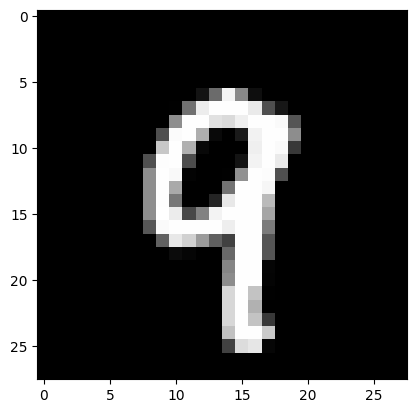

In [33]:
index = random.randrange(0, X_train.shape[1]) #This is to choose a random number from the random range 0 to the second element of the tuple X_train.shape which is 1000
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray') #this code uses the matplotlib.pyplot library to show the image at the random index generated above and reshape it from a flattened image to a 2D image. Since we want the image in white and black we do... cmap = 'gray'
plt.show() #This displays the image

DEFINING THE FUNCTIONS TO BE USED FOR THE HIDDEN AND OUTPUT LAYERS

In [34]:
def tanh(x):
    return np.tanh(x)#This returns the results when a value is placed in the actual tanh function

def relu(x):
    return np.maximum(x,0) #This returns the same number when it's greater than zero and returns 0 when the number is negative. This is exactly what the relu function does.

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)#This is the exact coding of the softmax function.

DEFINING THE DERIVATIVES OF THE FUNCTIONS IN CODE

In [35]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2)) #If you look at the derivatives you would see that this was the result of differentiating the tanh function

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

INITIALIZE PARAMETERS

In [36]:
def initialize_parameters(n_x, n_h, n_y): #n_x is the number of neurons in the input layer, n_h is the number of neurons in the hidden layer and n_y is the number of neurons in the output layer.
    w1 = np.random.randn(n_h, n_x) * 0.001 #Over here we generate the first weights, w1 by using the number of neurons in the input and hidden layer to produce random values. Usually these random values produces are huge so we try to minimize them by the multiplication by 0.001. This is because when the weights are huge, the learning is slow so we minimize the weights to increase the learning.This can be seen by observing the gradient descent formula with a small W, when subtracted by the product of the gradient and the learning rate, the total reduction is more than if the weight W was large
    b1 = np.zeros((n_h, 1)) #This is to initialize the bias first with a column of zeros. It's easier to track updating of the parameters knowing you started with a bias of zero

    w2 = np.random.randn(n_y, n_h) * 0.001
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters #Since there were a lot of things to return it's neater to put them in a single dictionary and return the dictionary.

FORWARD PROPAGATION
# Forward Propagation

We need to impletement the following equation for forward propagation :

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

For f(x), you can use either tanh or ReLU activation function. 

But also use the same for Backpropagation as well

In [37]:
def forward_propagation(x, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1 #np.dot(w1, x) is for doing matrix multiplication between w1 and x
    a1 = relu(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

# Cost Function

$Loss = - \sum_{k=1}^{n}[ y_k*log(a_k) ]$ .. *for 1 observation*

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$  .. *for all m observations*

You need to return the cost in the below function

You can use np.sum()
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A
- np.sum(A) returns the summation of all the elements of A

*keepdims = True keeps the dimenstion in place. In certain cases, the returned sum can be of shape(m,) instead of shape(m, 1).
So, keepdims = True forces it to return the sum in shape(m, 1) instead of shape(m,)*


More about np.sum() here : https://numpy.org/doc/stable/reference/generated/numpy.sum.html


In [38]:
def cost_function(a2, y):
    m = y.shape[1] #y.shape returns the dimension of the matrix y (row, column). The parameter 1 selects the column so the m would contain the number of the column

    cost = -(1/m) * np.sum(y*np.log(a2)) #This impliments the cost function
    #cost = -(1/m) * np.sum(np.sum(y * np.log(a2, 0), 1)) This does the same as the above

    return cost

# Backward Propagation

We need to implement the below equations

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.A_1^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

Helper python functions :
- A.T returns the transpose of matrix A
- np.dot(A, B) returns the matrix multiplication of A and B
- A*B returns the element wise multi-plication for A and B
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A

   

In [39]:
def backward_prop(x, y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True) #keepdims = True helps the output to maintain its dimensions. axis = 1 is to ensure column summation

    dz1 = (1/m) * np.dot(w2.T, dz2) * derivative_relu(a1)
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2,

    }
    return gradients


UPDATE PARAMETERS

In [40]:
def update_parameters(parameters, gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

COMPLETE MODEL

In [41]:
def model(x, y, n_h, learning_rate, iterations):

    n_x = x.shape[0] #Over here since the input and output layers have only one column, passing in the number 0 allows us to have the number of rows, which is the number of neurons in the input layer, x or the output layer, y
    n_y = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):
        forward_cache = forward_propagation(x, parameters)

        cost = cost_function(forward_cache['a2'], y)

        gradients = backward_prop(x, y, parameters, forward_cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if(i % (iterations/10) == 0):
            print("Cost after ", i, " iterations is :", cost)
            

    return parameters, cost_list



In [42]:
iterations = 100
n_h = 1000 #We choose 1000 neurons in our hidden layer because our input layer has 784 input features hence 784 neurons so our hidden layer must have a few more neurons, hence 1000
learning_rate = 0.005
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after  0  iterations is : 2.307807888279226


Cost after  10  iterations is : 1.4570750272814925
Cost after  20  iterations is : 1.0820216534333684
Cost after  30  iterations is : 0.8818749351359002
Cost after  40  iterations is : 0.7569021658867576
Cost after  50  iterations is : 0.6703087900409286
Cost after  60  iterations is : 0.6059864575131515
Cost after  70  iterations is : 0.5558057503669956
Cost after  80  iterations is : 0.5152114654874987
Cost after  90  iterations is : 0.48146403822335776


PLOTTING THE COST AT 10 ITERATIONS OF THE TRAINING

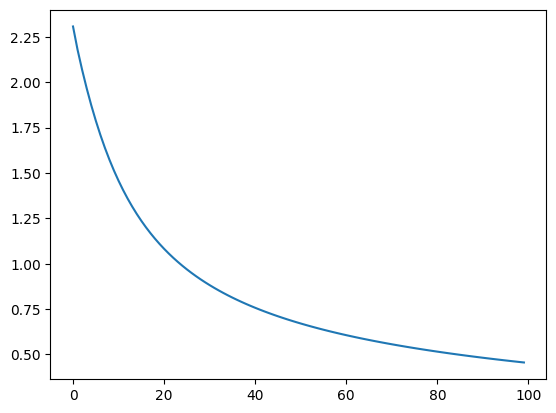

In [43]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

CHECKING THE ACCURACY OF THE MODEL

In [44]:
def accuracy(inp, labels, parameters):    
    forward_cache = forward_propagation(inp, parameters)#passing the forward propagation output results to this variable
    a_out = forward_cache['a2']#Assigning the results of the output neurons of the output layer to a_out

    a_out = np.argmax(a_out, 0)#In the row of the output probabilistic results, the np.argmax finds the maximum value

    y_out = np.argmax(labels, 0)#In the row of the labels, the np.argmax finds the maximum value
    a_out == y_out #This checks whether the predicted(a_out) is the same as the actual value(y_out)

    acc = np.mean(a_out == y_out) * 100
    '''The code np.mean(a_out == y_out) * 100 is used to calculate the percentage of correct predictions when comparing two arrays a_out and y_out. Here's what each part of the code does:

a_out == y_out: This performs an element-wise comparison between the two arrays a_out and y_out. It returns a Boolean array of the same shape as a_out and y_out, where each element is True if the corresponding elements in a_out and y_out are equal, and False otherwise.

np.mean(...): This calculates the mean (average) of the Boolean array produced in the previous step. In this context, it calculates the percentage of True values in the Boolean array because True is treated as 1 and False as 0 when calculating the mean.

* 100: This part multiplies the mean by 100 to convert the result to a percentage.

So, the entire expression np.mean(a_out == y_out) * 100 calculates the percentage of correct predictions by comparing the elements of the arrays a_out and y_out. It provides the accuracy as a percentage value'''

    return acc



In [45]:
print("Accuracy of Train Dataset is : ", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset is : ", accuracy(X_test, Y_test, Parameters), "%")

Accuracy of Train Dataset is :  91.9 %
Accuracy of Test Dataset is :  86.85714285714286 %


NOW WE ARE GOING TO DISPLAY AN IMAGE AND MAKE PREDICTIONS WITH THAT IMAGE

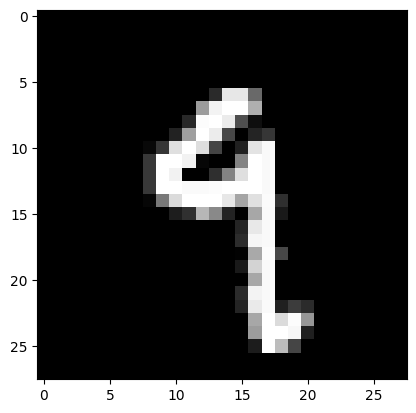

Our model says, it is :  9


In [48]:
idx = random.randrange(0, X_test.shape[1])
plt.imshow(X_test[:, idx].reshape(28, 28), cmap = 'gray')
plt.show()

forward_cache = forward_propagation(X_test[:, idx].reshape(X_test.shape[0], 1), Parameters)
a_out = forward_cache['a2']
a_out = np.argmax(a_out, 0)

print("Our model says, it is : ", a_out[0])